# **Presentado por:** Alejandro Perez y Nathaly Henao

# **1. Contexto del Análisis**

Créditos Parra y Compañía es una empresa en Colombia, con sede principal en Leticia. Opera en comercio de artículos electrónicos, electrodomésticos, gasodomesticos muebles y equipos de iluminacion en establecimientos especializados. Actualmente, la empresa está iniciando una transición hacia la analítica de datos para mejorar el control y la eficiencia en sus procesos.

# **2. Pregunta SMART:**

Uno de los principales problemas identificados es el alto porcentaje de cartera vencida, que promedia el 46%. Este problema puede ser abordado mediante técnicas de ciencia de datos e inteligencia artificial (IA), 
que permitirán organizar la información, descubrir patrones, visualizar datos y predecir riesgos y oportunidades, facilitando la toma de decisiones y la automatización de procesos

*¿Cuáles son los clientes que tienen una alta probabilidad de continuar o iniciar con cartera vencida en los meses restantes del 2024?*


# **3. Diccionario de datos:**

| Variable    | Descripción                                                 | 
|-------------|-------------------------------------------------------------|     
| Código      | NIT o identificar del cliente                               | 
| Documento   | Identificador de la factura                                 | 
| fec_ela     | Fecha de elaboración de la factura                          | 
| fec_vcto    | Fecha de vencimiento de la factura                          | 
| dias_vcto   | Días de vencimiento de la factura                           | 
| sin_vencer  | Valor monetario que no se ha vencido de la factura          | 
| _01_30      | Edad de la cartera que presenta vencimiento entre 01_30 días|
| _61_90      | Edad de la cartera que presenta vencimiento entre 61_90 días|
| mas_de_90   | Edad de la cartera que presenta vencimiento >90 días        |
| total       | Total valor de la deuda                                     |





In [ ]:
#Importar librerias 

import pandas as pd
from datetime import datetime
import numpy as np
from datetime import datetime
import os

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
# Ruta de la carpeta que contiene los archivos
folder_path = 'C:/Users/Aleja/OneDrive/Escritorio/Cartera/Proyecto - Análisis exploratorio/'

# Listar todos los archivos .xlsx en la carpeta
file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# Crear una lista para almacenar los DataFrames
dfs = []

# Función para extraer el mes, año y la fecha completa del nombre del archivo
def extract_date_from_filename(filename):
    # Suponiendo que el formato es "Proyección de Vencimientos DDMMYYYY.xlsx"
    base_name = os.path.splitext(filename)[0]
    date_str = base_name.split()[-1]  # Extraer "DDMMYYYY"
    if len(date_str) == 8:  # Verificar que la longitud sea correcta
        try:
            # Convertir la cadena a un objeto datetime
            date_obj = datetime.strptime(date_str, '%d%m%Y')
            # Formatear a "mes año" (ej. "feb 2023")
            month_year = date_obj.strftime('%b %Y').lower()  # %b es el mes abreviado en inglés
            # Obtener la fecha completa en formato 'YYYY-MM-DD'
            full_date = date_obj.strftime('%Y-%m-%d')
            return month_year, full_date
        except ValueError:
            return None, None
    return None, None

# Leer cada archivo y agregar su DataFrame a la lista
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path)
    
    # Extraer el mes y año y la fecha completa del nombre del archivo
    month_year, full_date = extract_date_from_filename(file_name)
    if month_year and full_date:
        df['mes_año'] = month_year  # Agregar la columna con mes y año
        df['fecha_completa'] = full_date  # Agregar la columna con la fecha completa
    
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
df = pd.concat(dfs, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(df.head(5))

       codigo                            nombre   cu     documento  \
0   900692604  AAA MAQUINARIAS & MATERIALES SAS  1.0  FC-003657-01   
1         NaN                               NaN  NaN           NaN   
2  1121214895        ABOU ABBAS ABOU HAMIA OMAR  1.0  FE-012956-06   
3         NaN                               NaN  NaN           NaN   
4    15877276              ACHO ARAUJO DIOMEDES  1.0  FE-013145-05   

       fec_ela     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  \
0  2022-DIC-31  2020-FEB-28       1096           0       0       0       0   
1          NaN          NaN          0           0       0       0       0   
2  2022-DIC-31  2023-MAR-28        -28      201000       0       0       0   
3          NaN          NaN          0           0       0       0       0   
4  2022-DIC-31  2023-MAR-10        -10      260000       0       0       0   

   mas_de_90  vend_tmp    total   mes_año fecha_completa  
0    2128950       NaN  2128950  feb 2023     2023-

In [ ]:
# Mostrar las primeras filas del DataFrame combinado
print(df.head(5))

       codigo                            nombre   cu     documento  \
0   900692604  AAA MAQUINARIAS & MATERIALES SAS  1.0  FC-003657-01   
1         NaN                               NaN  NaN           NaN   
2  1121214895        ABOU ABBAS ABOU HAMIA OMAR  1.0  FE-012956-06   
3         NaN                               NaN  NaN           NaN   
4    15877276              ACHO ARAUJO DIOMEDES  1.0  FE-013145-05   

       fec_ela     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  \
0  2022-DIC-31  2020-FEB-28       1096           0       0       0       0   
1          NaN          NaN          0           0       0       0       0   
2  2022-DIC-31  2023-MAR-28        -28      201000       0       0       0   
3          NaN          NaN          0           0       0       0       0   
4  2022-DIC-31  2023-MAR-10        -10      260000       0       0       0   

   mas_de_90  vend_tmp    total   mes_año fecha_completa  
0    2128950       NaN  2128950  feb 2023     2023-

In [ ]:
# Mostrar las últimas filas filas del DataFrame combinado
print(df.tail(5))

      codigo                               nombre  cu documento fec_ela  \
29803    NaN                                  NaN NaN       NaN     NaN   
29804    NaN  Empresa:CREDITOS PARRA Y CIA S.A.S. NaN       NaN     NaN   
29805    NaN  Cuenta:130515   Cartera de clientes NaN       NaN     NaN   
29806    NaN                              General NaN       NaN     NaN   
29807    NaN               2024.08.06 03:05:24 PM NaN       NaN     NaN   

      fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  mas_de_90  \
29803      NaN          0           0       0       0       0          0   
29804      NaN          0           0       0       0       0          0   
29805      NaN          0           0       0       0       0          0   
29806      NaN          0           0       0       0       0          0   
29807      NaN          0           0       0       0       0          0   

       vend_tmp  total   mes_año fecha_completa  
29803       NaN      0  dec 2023     2023-

# **4.Preparación de los datos:**

Se arreglan unos tipos de datos, dado que más adelante necesitaremos sólo las variables númericas para el gráfico de correlación.

In [ ]:
# Corregir los tipos de datos
df['codigo'] = df['codigo'].astype(str)
df['nombre'] = df['nombre'].astype(str)
df['documento'] = df['documento'].astype(str)

Revisamos el tipo de dato, la cantidad de registros presentes en el dataframe

In [ ]:
# Visualizar estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29808 entries, 0 to 29807
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   codigo          29808 non-null  object 
 1   nombre          29808 non-null  object 
 2   cu              23886 non-null  float64
 3   documento       29808 non-null  object 
 4   fec_ela         23886 non-null  object 
 5   fec_vcto        23886 non-null  object 
 6   dias_vcto       29808 non-null  int64  
 7   sin_vencer      29808 non-null  int64  
 8   _01_30          29808 non-null  int64  
 9   _31_60          29808 non-null  int64  
 10  _61_90          29808 non-null  int64  
 11  mas_de_90       29808 non-null  int64  
 12  vend_tmp        14298 non-null  float64
 13  total           29808 non-null  int64  
 14  mes_año         29808 non-null  object 
 15  fecha_completa  29808 non-null  object 
dtypes: float64(2), int64(7), object(7)
memory usage: 3.6+ MB


Eliminamos columnas innecesarias

In [ ]:
# Eliminar columnas innecesarias
df = df.drop(columns=['nombre', 'cu', 'vend_tmp'], index=1)

Verificamos los valores nulos presentes en el dataframe, encontramos que son varíos y se deben a la estructura de documento generada por el ERP.

In [ ]:
# Ver na por columna
df.isna().sum()

codigo               0
documento            0
fec_ela           5921
fec_vcto          5921
dias_vcto            0
sin_vencer           0
_01_30               0
_31_60               0
_61_90               0
mas_de_90            0
total                0
mes_año              0
fecha_completa       0
dtype: int64

In [ ]:
# Eliminar n/a
df = df.dropna()

In [ ]:
# Ver na por columna
df.isna().sum()

codigo            0
documento         0
fec_ela           0
fec_vcto          0
dias_vcto         0
sin_vencer        0
_01_30            0
_31_60            0
_61_90            0
mas_de_90         0
total             0
mes_año           0
fecha_completa    0
dtype: int64

De igual forma, el formato que viene del ERP no permite trabajar con los valores de fecha, por lo tanto, se hace un arreglo para poder trabajar con las columnas de fecha, además se crea una variable sintetica para revisar valores en donde la fecha de elaboración sea mayor que la fecha de vencimiento, técnicamente esto no debería ser posible, pero por temas de gobernanza de datos no existente, ocurren estos casos.

In [ ]:
# Primero, crea un diccionario de los meses en español

meses_esp = {'ENE': '01', 'FEB': '02', 'MAR': '03', 'ABR': '04', 'MAY': '05', 
             'JUN': '06', 'JUL': '07', 'AGO': '08', 'SEP': '09', 'OCT': '10', 
             'NOV': '11', 'DIC': '12'}

# Función para reemplazar el mes en la cadena de fecha
def convertir_fecha(fecha):
    for mes, num in meses_esp.items():
        if mes in fecha.upper():
            fecha = fecha.upper().replace(mes, num)
    return fecha

# Aplicar la función a las columnas de fecha antes de convertirlas a datetime
df['fec_ela'] = df['fec_ela'].apply(convertir_fecha)
df['fec_vcto'] = df['fec_vcto'].apply(convertir_fecha)

# Ahora convierte a datetime usando el formato 'YYYY-MM-DD'
df['fec_ela'] = pd.to_datetime(df['fec_ela'], format='%Y-%m-%d')
df['fec_vcto'] = pd.to_datetime(df['fec_vcto'], format='%Y-%m-%d')
df['fecha_completa'] = pd.to_datetime(df['fecha_completa'], format='%Y-%m-%d')

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)

# Validar fechas
df['val_fec'].value_counts()

val_fec
0    17984
1     5902
Name: count, dtype: int64

Imputaremos las fechas de elaboración con la media del promedio de días entre las fecha de elaboración y la fecha de vencimiento, acá no tenemos en cuenta los valores mayores en fecha de elaboración, puesto que afectarían directamente el cálculo, depués de conseguir el valor, lo imputamos en la fecha de elaboración, tomando la fecha de venccimiento y restandole los 184 días promedio, esto tiene mucho sentido, ya que nos dice que los prestamos en general se sacan apróximadamente por 6 meses.

In [ ]:
# Calcular la diferencia en días entre 'fec_vcto' y 'fec_ela'
dif_days = np.where((df['fec_vcto'] - df['fec_ela']).dt.days>0,(df['fec_vcto'] - df['fec_ela']).dt.days,0)

# Calcular la media de la diferencia en días
df_mean = np.mean(dif_days)

print(df_mean)

184.6253453906054


In [ ]:
# Imputar los valores tipo 1 en 'fec_ela' restando 30 días de 'fec_vcto' donde 'val_fec' es 1
df['fec_ela'] = np.where(df['val_fec'] == 1, df['fec_vcto'] - pd.Timedelta(days=184), df['fec_ela'])

# Crear la variable 'val_fec' comparando 'fec_ela' y 'fec_vcto'
df['val_fec'] = np.where(df['fec_ela'] > df['fec_vcto'], 1, 0)

# Validar fechas
df['val_fec'].value_counts()

val_fec
0    23886
Name: count, dtype: int64

Al encontrar esta diferencia en la fecha de elaboración se procederá a revisar los días de vencimiento, es claro que si las fechas de elaboración se encontraban mal parametrizadas, estos días de vencimiento también tendrán algún error, por lo tanto, revisamos su comportamiento, en teoría no deben existir valores negativos

In [ ]:
# Arreglar días de vcto
df['dias_vcto'] = np.where(df['sin_vencer'] == 0, (df['fecha_completa'] - df['fec_ela']).dt.days , 0)

In [ ]:
df['_01_30'].describe().round(2)

count       23886.00
mean        73816.05
std       1230849.13
min      -8332500.00
25%             0.00
50%             0.00
75%             0.00
max      78605030.00
Name: _01_30, dtype: float64

In [ ]:
#No deben existir negativos ni valores totales menores a cualquier edad, se procede a eliminar estos registros
df = df[(df['_01_30'] >= 0) & (df['_31_60'] >= 0) & (df['_61_90'] >= 0) & (df['mas_de_90'] >= 0) & (df['total'] >= df['sin_vencer']) & (df['sin_vencer'] >= 0)]

df

,codigo,documento,fec_ela,fec_vcto,dias_vcto,sin_vencer,_01_30,_31_60,_61_90,mas_de_90,total,mes_año,fecha_completa,val_fec
0,900692604,FC-003657-01,2019-08-28,2020-02-28,1280,0,0,0,0,2128950,2128950,feb 2023,2023-02-28,0
2,1121214895,FE-012956-06,2022-12-31,2023-03-28,0,201000,0,0,0,0,201000,feb 2023,2023-02-28,0
5,15877276,FE-013145-06,2022-12-31,2023-04-10,0,260000,0,0,0,0,520000,feb 2023,2023-02-28,0
8,41061479,FE-010474-12,2022-12-31,2023-04-27,0,351000,0,0,0,0,702000,feb 2023,2023-02-28,0
10,40150589,CR-018472-05,2017-09-30,2018-04-02,1977,0,0,0,0,111000,0,feb 2023,2023-02-28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29790,1121201338,FE-020055-06,2023-12-04,2024-06-02,0,211000,0,0,0,0,1055000,dec 2023,2023-12-31,0
29792,830010181,FE-017467-00,2023-06-29,2023-07-29,185,0,0,0,0,46288,46288,dec 2023,2023-12-31,0
29795,41058861,FE-018488-06,2023-08-25,2024-03-01,0,214000,0,0,0,0,428000,dec 2023,2023-12-31,0
29797,1088321782,FE-017856-06,2023-07-19,2024-01-19,0,237000,0,0,0,0,237000,dec 2023,2023-12-31,0


Verificamos porque no pueden existir  valores en la edad de la cartera negativo. Al realizar el análisis posteriormente, se encuentra la presencia de valores negativos, por tanto se limpia la base.

In [ ]:
#Verifico que no existan valores negativos en estas 4 columnas
# Verificar si hay valores negativos en las columnas especificadas
negative_values = df[(df['_01_30'] < 0) |
                                  (df['_31_60'] < 0) |
                                  (df['_61_90'] < 0) |
                                  (df['mas_de_90'] < 0)|
                                  (df['sin_vencer'] < 0)]

# Mostrar el resultado
negative_values

,codigo,documento,fec_ela,fec_vcto,dias_vcto,sin_vencer,_01_30,_31_60,_61_90,mas_de_90,total,mes_año,fecha_completa,val_fec


Al tener variables de edades de cartera es muy probable que una dependa de otra y no logremos tener relaciones fuertes entre variables para poder en algún momento predecir que puede pasar con un crédito, por lo tanto, se crean variables sinteticas a partir de las ya existentes para intentar identificar comportamientos.

In [ ]:
# Variables sinteticas
df['%_vencido'] = (df['total'] - df['sin_vencer']) / df['total'] * 100
df = df.loc[df['total'] > 0]

df = df.drop(columns=['val_fec'], axis=1)

# Creamos variable de interes

df['interes'] = np.where(df['dias_vcto'] > 0,'Cartera_venc','Cartera_sana')

df.head(5)


,codigo,documento,fec_ela,fec_vcto,dias_vcto,sin_vencer,_01_30,_31_60,_61_90,mas_de_90,total,mes_año,fecha_completa,%_vencido,interes
0,900692604,FC-003657-01,2019-08-28,2020-02-28,1280,0,0,0,0,2128950,2128950,feb 2023,2023-02-28,100.0,Cartera_venc
2,1121214895,FE-012956-06,2022-12-31,2023-03-28,0,201000,0,0,0,0,201000,feb 2023,2023-02-28,0.0,Cartera_sana
5,15877276,FE-013145-06,2022-12-31,2023-04-10,0,260000,0,0,0,0,520000,feb 2023,2023-02-28,50.0,Cartera_sana
8,41061479,FE-010474-12,2022-12-31,2023-04-27,0,351000,0,0,0,0,702000,feb 2023,2023-02-28,50.0,Cartera_sana
11,40150589,CR-018472-06,2017-10-30,2018-05-02,1947,0,0,0,0,169000,280000,feb 2023,2023-02-28,100.0,Cartera_venc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5665 entries, 0 to 29797
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   codigo          5665 non-null   object        
 1   documento       5665 non-null   object        
 2   fec_ela         5665 non-null   datetime64[ns]
 3   fec_vcto        5665 non-null   datetime64[ns]
 4   dias_vcto       5665 non-null   int64         
 5   sin_vencer      5665 non-null   int64         
 6   _01_30          5665 non-null   int64         
 7   _31_60          5665 non-null   int64         
 8   _61_90          5665 non-null   int64         
 9   mas_de_90       5665 non-null   int64         
 10  total           5665 non-null   int64         
 11  mes_año         5665 non-null   object        
 12  fecha_completa  5665 non-null   datetime64[ns]
 13  %_vencido       5665 non-null   float64       
 14  interes         5665 non-null   object        
dtypes: datet

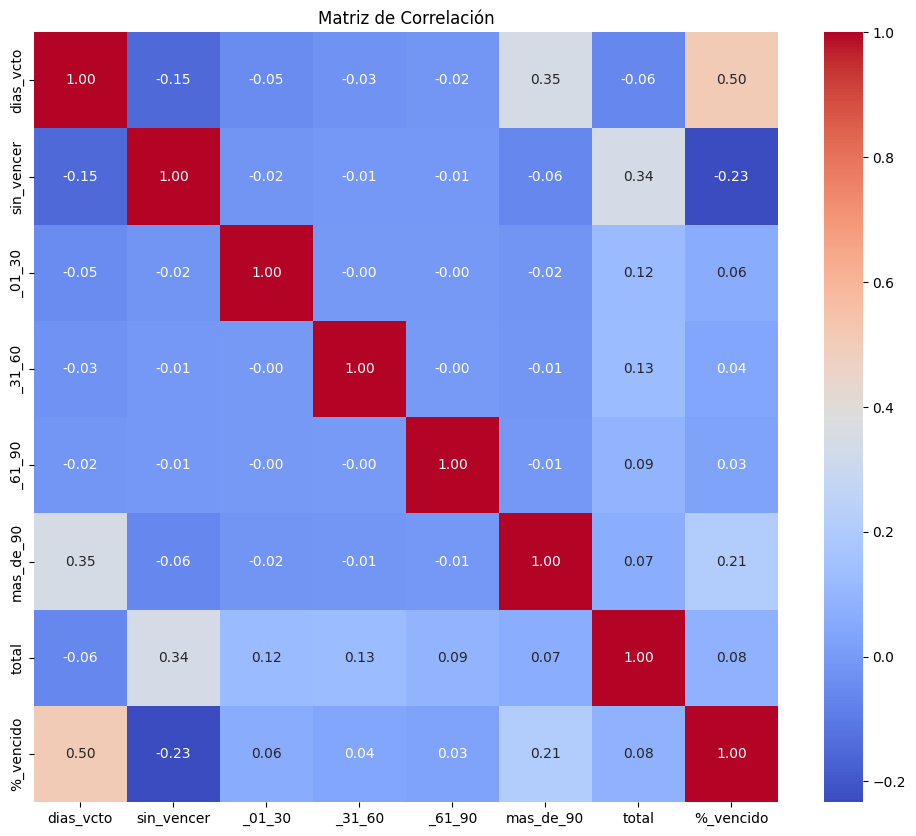

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Mostrar el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

Se realiza el gráfico de la matriz de correlación en donde encontramos que la sospecha es cierta, la mayoría de variables no poseen una relación fuerte entre ellas, sin embargo hay algunas con las que se podría trabajar, además las variables sinteticas creadas presentan mayor correlación con variables existentes o entre ellas, por lo tanto se utilizarán para revisar relaciones.

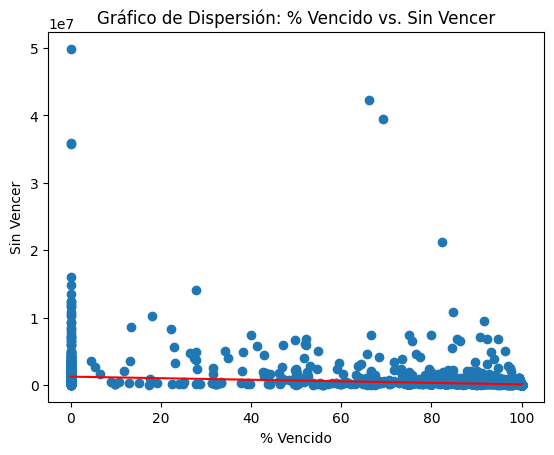

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(df['%_vencido'], df['sin_vencer'])

# Agregar etiquetas a los ejes
plt.xlabel('% Vencido')
plt.ylabel('Sin Vencer')

# Agregar un título al gráfico
plt.title('Gráfico de Dispersión: % Vencido vs. Sin Vencer')

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['%_vencido'], df['sin_vencer'])
plt.plot(df['%_vencido'], slope*df['%_vencido']+intercept, color='red')

# Mostrar el gráfico
plt.show()

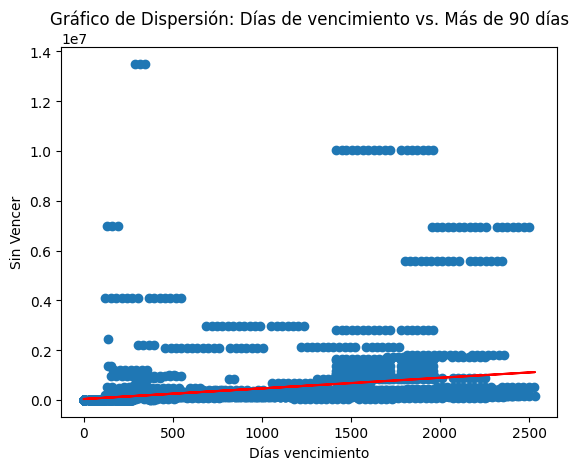

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(df['dias_vcto'], df['mas_de_90'])

# Agregar etiquetas a los ejes
plt.xlabel('Días vencimiento')
plt.ylabel('Sin Vencer')

# Agregar un título al gráfico
plt.title('Gráfico de Dispersión: Días de vencimiento vs. Más de 90 días')

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['dias_vcto'], df['mas_de_90'])
plt.plot(df['dias_vcto'], slope*df['dias_vcto']+intercept, color='red')

# Mostrar el gráfico
plt.show()

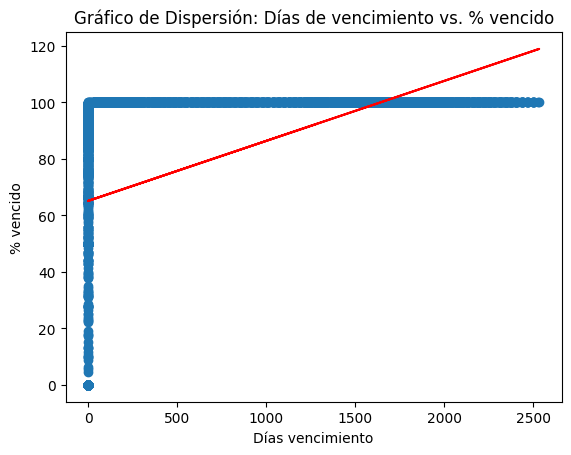

In [ ]:
# Crear el gráfico de dispersión
plt.scatter(df['dias_vcto'], df['%_vencido'])

# Agregar etiquetas a los ejes
plt.xlabel('Días vencimiento')
plt.ylabel('% vencido')

# Agregar un título al gráfico
plt.title('Gráfico de Dispersión: Días de vencimiento vs. % vencido')

from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['dias_vcto'], df['%_vencido'])
plt.plot(df['dias_vcto'], slope*df['dias_vcto']+intercept, color='red')

# Mostrar el gráfico
plt.show()

Conclusiones:
Durante la preparación de datos, se abordaron inconsistencias derivadas de la falta de un gobierno de datos en la empresa. Se corrigieron tipos de datos y formatos de fecha, se crearon variables sintéticas y se imputaron fechas de elaboración utilizando la media del intervalo entre la fecha de elaboración y la de vencimiento. En el análisis exploratorio, se identificaron y limpiaron valores negativos en la edad de la cartera. Por tanto, se iteró sobre el proceso de preparación para revisar nuevamente la exploración con datos más robustos y confiables.